## First EDA for the capstone project

### Starting to initialize the packages

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [48]:
df = pd.read_csv("/Users/janice/Documents/Bootcamp/Git/Capstone/capstone_chat-gpt/data/ChatGPT-play-reviews.csv", parse_dates=["at", "repliedAt"])

In [49]:
df.sort_values('repliedAt').head(20)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
7086,a0b52feb-b2a2-4999-9199-ec8cae3c4867,Christopher Schouten,I appreciate the developer's quick response to...,4,5,1.0.0023,2023-07-28 22:41:21,Thank you for your review. We have fixed an is...,2023-07-28 22:27:37,1.0.0023
12575,58aa9865-cb6c-4558-84eb-31c0f08949ac,Shivinder Singh,Why no option to login with Microsoft account?,3,0,1.0.0023,2023-07-28 16:13:11,Thank you for your review. We have fixed an is...,2023-07-28 22:27:47,1.0.0023
924,c3e3cffa-8a41-4f62-874d-1267864439bf,Kevin Almeida,It needs a minor update. It does not work with...,3,1,1.0.0023,2023-07-28 16:06:44,Thank you for your review. We have fixed an is...,2023-07-28 22:27:54,1.0.0023
6415,69e691d9-e60d-4568-b009-c7df5b9ca004,Uttam Deb,"Off to a good start, now need all the web feat...",5,2,1.0.0023,2023-07-30 16:28:54,Thank you for your review. We have fixed an is...,2023-07-28 22:28:05,1.0.0023
26869,41f04adb-7c1d-483a-98de-3924bd9d01dd,Eduardo Mejía Peralta,Tienen un problema en la parte de INICIAR SESI...,2,0,1.0.0023,2023-07-28 10:23:42,Thank you for your review. We have fixed an is...,2023-07-28 22:28:12,1.0.0023
2751,7cae8bf4-fc30-446a-a9bf-59da2850a231,B M,Unable to log-in with Google and Microsoft. Al...,1,0,1.0.0023,2023-07-28 00:56:16,Thank you for your review. We have fixed an is...,2023-07-28 22:30:16,1.0.0023
14434,25eb7b24-70d5-4d14-bbcf-85de99edf5f4,James and Michelle Clark,"Hoping Microsoft login support will added, I p...",3,1,NaN,2023-07-27 19:17:13,Thank you for your review. We have fixed an is...,2023-07-28 22:30:28,NaN
11012,f447f076-0001-45f0-9442-427b47fbbf7f,Luís Felipe Baptista,Can't connect with Microsoft account,5,0,1.0.0023,2023-07-28 22:32:07,Thank you for your review. We have fixed an is...,2023-07-28 22:30:49,1.0.0023
2208,4858c378-77be-4ec8-b8bc-caf4b696131e,Abhijith M B,I couldn't find the option to login with my Mi...,3,0,1.0.0023,2023-07-27 07:58:45,Thank you for your review. We have fixed an is...,2023-07-28 22:30:54,1.0.0023
6485,b7c607aa-5179-471e-a5c4-0bb9bfcedd44,Troy R,"MS login fixed thank you! Login function, plea...",5,0,1.0.0023,2023-07-26 23:40:49,Thank you for your review. We have fixed an is...,2023-07-28 22:31:08,1.0.0023


### Get an overview of the data

In [50]:
df.shape

(30956, 10)

In [51]:
df.info()
# confirm there are no objects where a float or int would be expected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30956 entries, 0 to 30955
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              30956 non-null  object        
 1   userName              30955 non-null  object        
 2   content               30956 non-null  object        
 3   score                 30956 non-null  int64         
 4   thumbsUpCount         30956 non-null  int64         
 5   reviewCreatedVersion  26042 non-null  object        
 6   at                    30956 non-null  datetime64[ns]
 7   replyContent          432 non-null    object        
 8   repliedAt             432 non-null    datetime64[ns]
 9   appVersion            26042 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 2.4+ MB


In [52]:
df.describe()

,score,thumbsUpCount,at,repliedAt
count,30956.000000,30956.000000,30956,432
mean,4.409517,0.840386,2023-08-28 14:32:13.029331712,2023-08-15 10:15:24.585647872
min,1.000000,0.000000,2023-07-25 17:01:35,2023-07-28 22:27:37
25%,4.000000,0.000000,2023-07-28 23:09:44,2023-08-09 22:12:59
50%,5.000000,0.000000,2023-08-27 16:00:04,2023-08-09 22:27:26.500000
75%,5.000000,0.000000,2023-09-22 17:19:36.750000128,2023-08-29 22:07:28.750000128
max,5.000000,1067.000000,2023-10-22 21:46:22,2023-10-23 20:13:58
std,1.215837,14.997456,NaN,NaN


In [53]:
# display number of missing values per column
df.isna().sum()

reviewId                    0
userName                    1
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion     4914
at                          0
replyContent            30524
repliedAt               30524
appVersion               4914
dtype: int64

<Axes: >

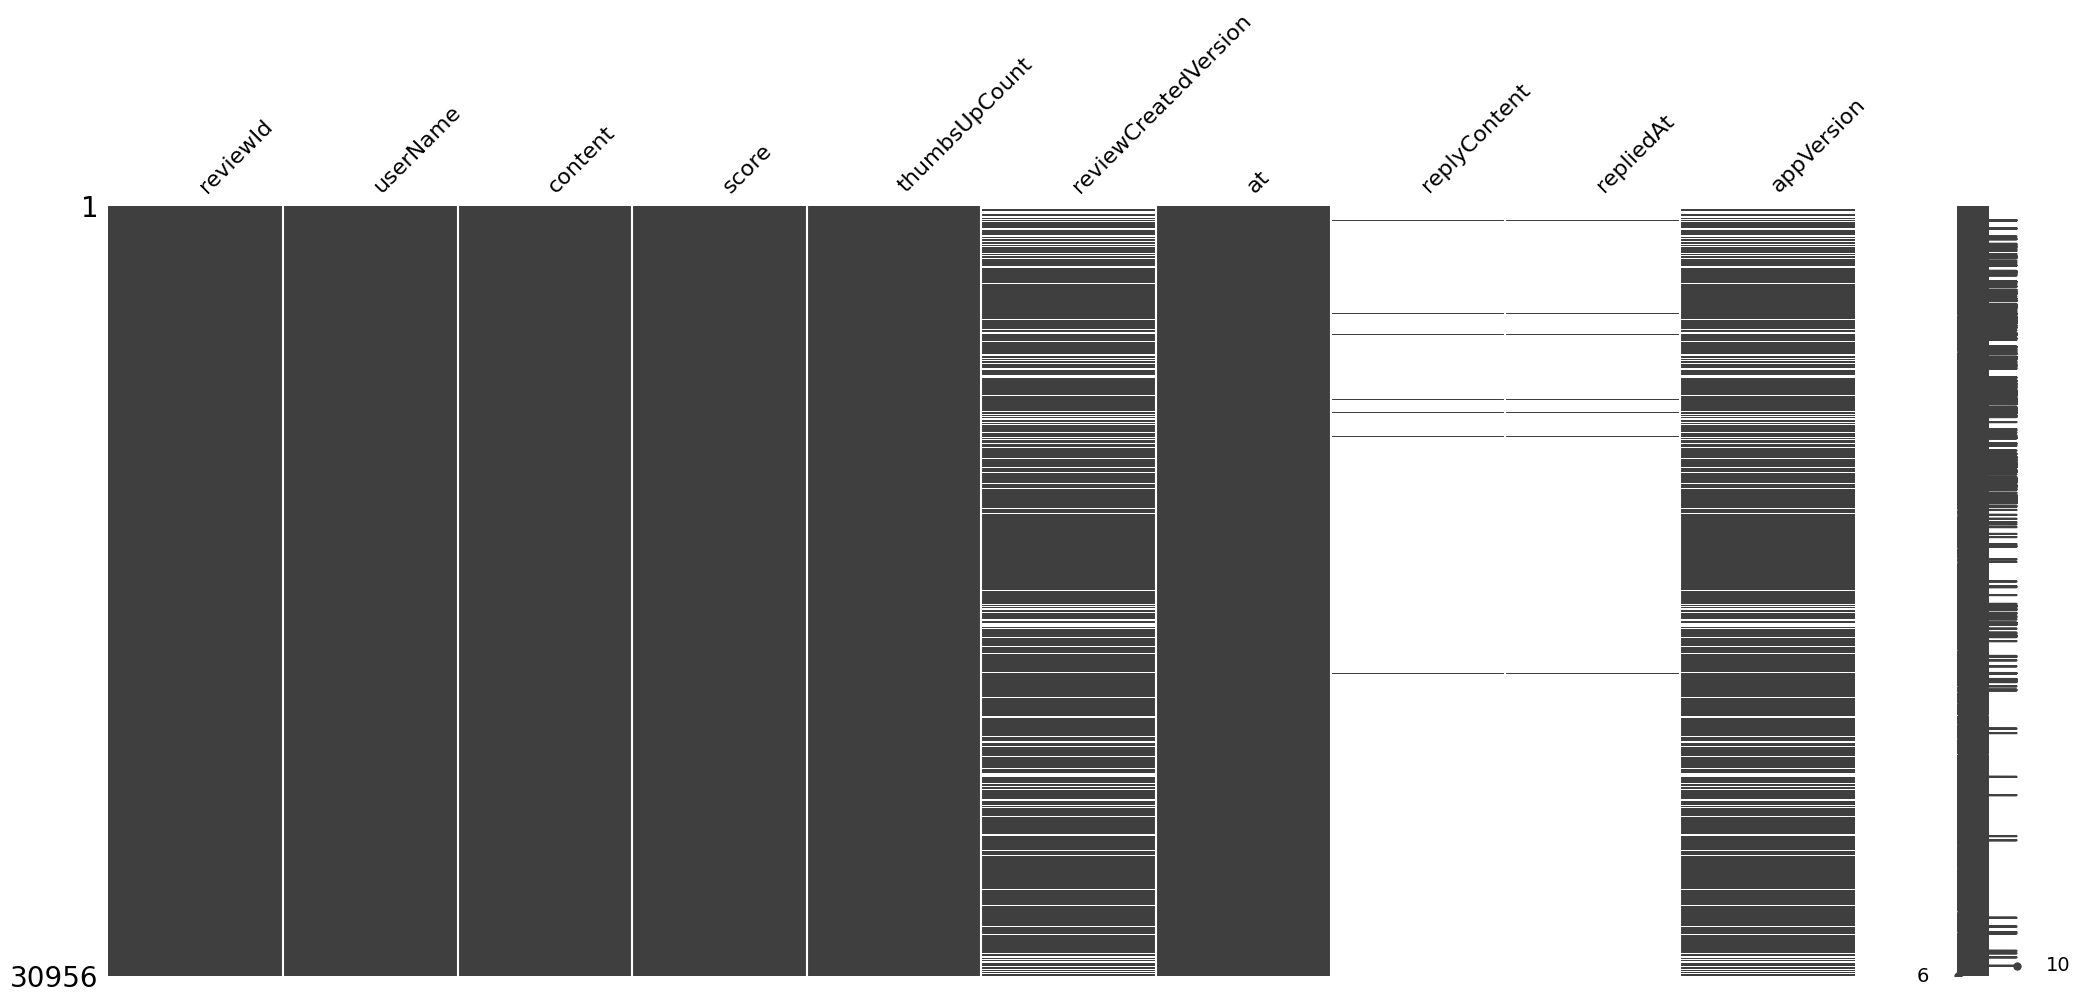

In [54]:
# missings in renovated could be an issue
# sort by at to inspect structural missing bias
msno.matrix(df.sort_values('at'))

In [55]:
# var for review received response
df["reply"] = np.where(df.replyContent.isnull(), 0, 1)

In [58]:
df[["reply","replyContent"]].query("reply == 1")

,reply,replyContent
8,1,Are you still experiencing this issue?
19,1,Thanks for your feedback on the issue with dar...
80,1,Thanks for your patience! Voice has been rolle...
93,1,Thank you for your review. We have fixed an is...
119,1,Thank you for your review! We've implemented a...
...,...,...
28843,1,Thank you for your feedback. We've improved lo...
28989,1,Thank you for your feedback. We've improved lo...
29040,1,Thank you for your feedback. We've improved lo...
29281,1,What problem are you experiencing with logging...


In [71]:
df[["thumbsUpCount", "content", "replyContent", "reply"]].query("reply == 1").groupby(["thumbsUpCount", "content", "replyContent"]).count().head(10)


reply
thumbsUpCount content                                            replyContent                                             
0             A comaptible browser for login was not found       Thank you for your feedback. We've improved log...      1
              Add support for material you themed icon           Thanks for your feedback on the icon! We've add...      1
              After downloading and trying to open the app ke... Thanks for updating us. Can you please reach ou...      1
              All I can say is dope 💯                            Thanks for your review. Are you still experienc...      1
              All the chats were completely wiped out please ... Thanks for your review. Are you still experienc...      1
              Always login error                                 Thank you for your feedback. We've improved log...      1
              Always says network error even I have a strong ... Thank you for your feedback. Is this problem st...      1
              App crash a lot                                    Thank you for your review! We've implemented a ...      1
              App is crashing                                    Thank you for your feedback. Is this problem st...      1
              App is not working properly I have tried 10 tim... Thank you for your feedback. We've improved log...      1

In [44]:
df_version = df[["reviewCreatedVersion", "appVersion"]].query("reviewCreatedVersion != appVersion")

print(df_version["reviewCreatedVersion"].unique())
print(df_version["appVersion"].unique())


[nan]
[nan]


Both variables on the version are equal therefore we only need to keep one and delete the other.

In [72]:
df = df.drop('reviewCreatedVersion', axis=1)

In [93]:
# generate new date features from at
df['at_ymd'] = df['at'].dt.strftime('%D')
# Create new column for year-quarter
df['at_q'] = df['at'].dt.quarter
# Create new column for year-month
df['at_ym'] = df['at'].dt.strftime('%Y-%m')
# Create new column for month
df['at_m'] = df['at'].dt.strftime('%B')
# Create new column for year-month
df['at_wd'] = df['at'].dt.strftime('%A')

df.head(3)

,reviewId,userName,content,score,thumbsUpCount,at,replyContent,repliedAt,appVersion,reply,at_ym,at_m,at_wd,at_q,at_d,at_ymd
0,36b7f28e-151d-4b98-8a13-41bd017e0d25,Lin Cheng,ChatGPT on Android is a solid app with seamles...,4,5,2023-10-19 19:26:19,NaN,NaT,1.2023.284,0,2023-10,October,Thursday,4,19,10/19/23
1,2bc253b6-c804-47e9-b6f2-3a21027efab4,Alim,I've been using chatGPT for a while but I've j...,5,139,2023-09-29 20:24:38,NaN,NaT,1.2023.263,0,2023-09,September,Friday,3,29,09/29/23
2,5f084727-ab85-40b3-bd42-a7a49502fc1f,Theo Healy,The ChatGPT Android app has completely blown m...,4,247,2023-07-28 10:29:10,NaN,NaT,1.0.0023,0,2023-07,July,Friday,3,28,07/28/23


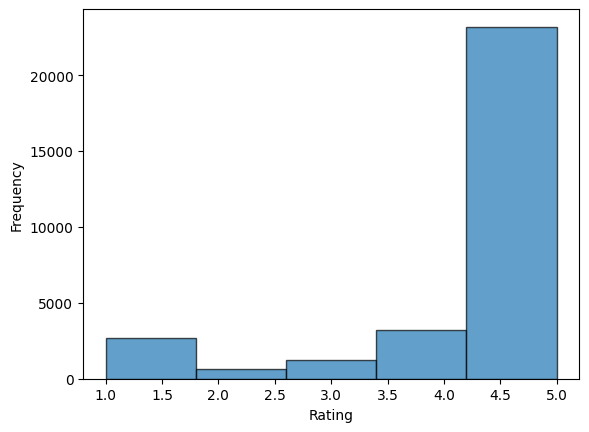

In [77]:
plt.hist(df["score"], bins=5, edgecolor='black', alpha=0.7)

# Customize the plot
plt.title('')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Display the plot
plt.show()

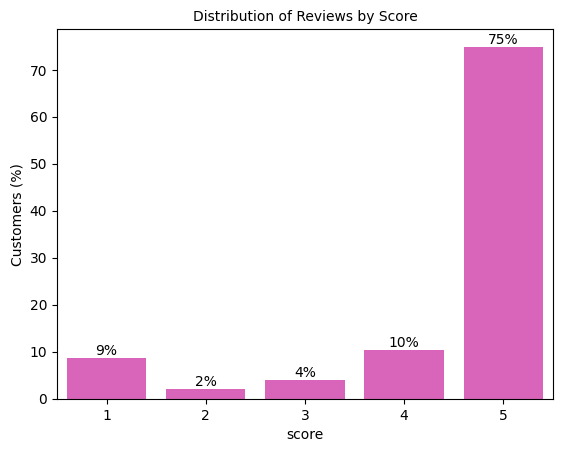

In [83]:
df_chart = df.groupby(['score']).size().reset_index(name='Customers') 
df_chart['Customers (%)'] = df_chart['Customers'].transform(lambda x: x / x.sum() * 100)
ax = sns.barplot(x='score', y='Customers (%)', data=df_chart, palette=["#EC52C4"])

titel = 'Distribution of Reviews by Score'
plt.title(titel, fontsize = 10)

#ax.legend(title="Reply", loc = 'upper left')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%')
plt.show()

In [106]:
#define index column
df_at = df.groupby(['at_ym','score']).size().reset_index(name='Reviews') 
df_at['Reviews (%)'] = df_at.groupby('at_ym')['Reviews'].transform(lambda x: x / x.sum() * 100)
df_at

,at_ym,score,Reviews,Reviews (%)
0,2023-07,1,814,8.714270
1,2023-07,2,202,2.162509
2,2023-07,3,396,4.239375
3,2023-07,4,924,9.891875
4,2023-07,5,7005,74.991971
5,2023-08,1,834,10.998286
6,2023-08,2,173,2.281419
7,2023-08,3,338,4.457339
8,2023-08,4,818,10.787287
9,2023-08,5,5420,71.475669


<Axes: xlabel='at_ym', ylabel='Reviews'>

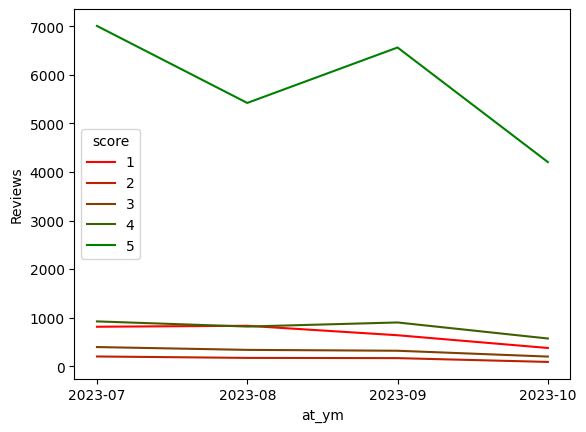

In [121]:
sns.lineplot(data=df_at, x="at_ym", y="Reviews", hue="score", palette="blend:r,g")

<Axes: xlabel='at_ym', ylabel='Reviews (%)'>

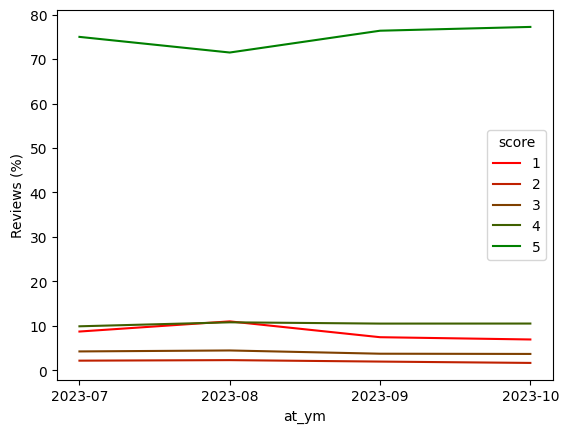

In [120]:
sns.lineplot(data=df_at, x="at_ym", y="Reviews (%)", hue="score", palette="blend:r,g")

In [99]:
# Function to group by fuzzy matching
from fuzzywuzzy import process, fuzz
from collections import Counter

def fuzzy_grouping(df, column_name, threshold=90):
    grouped = {}
    unique_values = df[column_name].unique()
    
    for value in unique_values:
        matched_group = process.extractOne(value, grouped.keys(), scorer=fuzz.ratio)
        if matched_group is not None and matched_group[1] >= threshold:
            grouped[matched_group[0]].append(value)
        else:
            grouped[value] = [value]
    
    return grouped

In [101]:
# Grouping the 'notes' column using fuzzy matching
grouped_notes = fuzzy_grouping(df, 'content', threshold=80)

# Calculate the frequency of each group
group_frequencies = Counter(grouped_notes.keys())

# Find the top 20 most frequent groups
top_20_groups = [group for group, count in group_frequencies.most_common(20)]

# Add an identifier column to the original DataFrame
df['contentgroup'] = df['content'].apply(lambda x: next((i+1 for i, group in enumerate(top_20_groups) if x in grouped_notes[group]), 0))

# Display the top 20 most frequent groups and the updated DataFrame
print("Top 20 Most Frequent Groups:")
for group in top_20_groups:
    print(group)
    
print("\nUpdated DataFrame:")
print(df)

KeyboardInterrupt: 

In [122]:
df.to_csv("/Users/janice/Documents/Bootcamp/Git/Capstone/capstone_chat-gpt/data/ChatGPT-play-reviews_prep.csv", index=False)